In [2]:
import pandas as pd
import gensim.models
import gensim.corpora
import gensim as gs
import pyLDAvis as pvis
import pyLDAvis.gensim
import gensim.models.coherencemodel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score
from gensim.models import FastText
from sklearn.metrics import classification_report

In [7]:
def load_topic_data(dataset_name):
    print("loading vector data for", dataset_name)
    sentences = pd.read_csv("../cleaned/" + dataset_name + "_stems.csv", delimiter=",").astype(str).values.tolist() 
    for index, sample in enumerate(sentences): 
            sentences[index] = list(filter((" ").__ne__, sample))
    #sentences_whole = [" ".join(sentence) for sentence in sentences_split]
    #tokens = [token for sentence in sentences_split for token in sentence]
    dic = gs.corpora.Dictionary(sentences)
    corpus = [dic.doc2bow(sample) for sample in sentences]
    #print("--- sentences_split: \n", sentences_split, "\n")
    #print("--- sentences_whole: \n", sentences_whole, "\n")
    #print("--- tokens: \n", tokens, "\n")
    return sentences, dic, corpus

def visualize_lda(model, corpus, dic):
    pvis.enable_notebook()
    vis = pvis.gensim.prepare(model, corpus, dic)
    vis.show()

def get_coherence_score(model, sentences, dic):
    # the higher the better it is, nutzen um versch. modelle zu vergleichen (mit untersch. topic-anzahö)
    coherence_model_lda = gensim.models.coherencemodel.CoherenceModel(model=model, texts=sentences, dictionary=dic, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    #print('\nCoherence Score: ', coherence_lda)
    return coherence_score

def draw_plot(dataset_name, x, y, best_coherence, best_num_topics):
    print(x)
    print(y)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel="num_topics", ylabel="coherence")
    desc = "dataset: {}\nbest coherence: {}, with topics: {}".format(dataset_name, best_coherence, best_num_topics)
    fig.text(0.5, -0.07, desc, ha='center')
    plt.grid()
    plt.show()
    fig.savefig("../img/num_topics_" + dataset_name + ".png", bbox_inches="tight")
    
def find_best_topic_num(dataset_name, lim_low, lim_high):
    coherences = []
    models = []
    sentences, dic, corpus = load_topic_data(dataset_name)
    for i in range(lim_low, lim_high+1):
        print(dataset_name + "... loop {} / {}".format(i, lim_high))
        #lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dic, num_topics=i, random_state=100,
        #                               update_every=1, chunksize=100, passes=10, per_word_topics=True)
        lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dic, num_topics=i, random_state=100,
                                       chunksize=100, passes=10, per_word_topics=True)#update_every=1, 
        models.append(lda_model)
        coherences.append(get_coherence_score(lda_model, sentences, dic))
    max_coherence_index = coherences.index(max(coherences))
    draw_plot(dataset_name, list(range(lim_low, len(coherences)+lim_low)), coherences, max(coherences), max_coherence_index+lim_low)
    models[max_coherence_index].save("../models/tm_" + dataset_name + ".model")

loading vector data for norm_test
norm_test... loop 25 / 200
norm_test... loop 26 / 200
norm_test... loop 27 / 200
norm_test... loop 28 / 200
norm_test... loop 29 / 200
norm_test... loop 30 / 200
norm_test... loop 31 / 200
norm_test... loop 32 / 200
norm_test... loop 33 / 200
norm_test... loop 34 / 200
norm_test... loop 35 / 200
norm_test... loop 36 / 200
norm_test... loop 37 / 200
norm_test... loop 38 / 200
norm_test... loop 39 / 200
norm_test... loop 40 / 200
norm_test... loop 41 / 200
norm_test... loop 42 / 200
norm_test... loop 43 / 200
norm_test... loop 44 / 200
norm_test... loop 45 / 200
norm_test... loop 46 / 200
norm_test... loop 47 / 200
norm_test... loop 48 / 200
norm_test... loop 49 / 200
norm_test... loop 50 / 200
norm_test... loop 51 / 200
norm_test... loop 52 / 200
norm_test... loop 53 / 200
norm_test... loop 54 / 200
norm_test... loop 55 / 200
norm_test... loop 56 / 200
norm_test... loop 57 / 200
norm_test... loop 58 / 200
norm_test... loop 59 / 200
norm_test... loop 60 

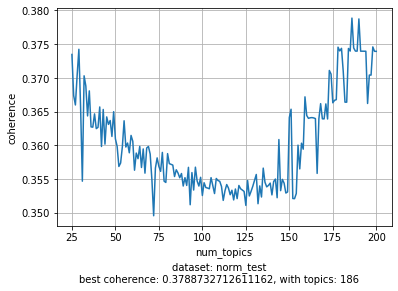

In [8]:
# find the optimal number of topics for each dataset
for dataset_name in ["norm_test"]: 
    find_best_topic_num(dataset_name, 25, 200)
#sentences, dic, corpus = make_topic_data("norm_test")

In [96]:


#topics = lda_model.show_topics()
#for topic in topics[:5]: 
#    print(topic)

#print(lda_model.get_topic_terms(topicid=1, topn=2))

In [ ]:
# show the first 10 topics
#print(lda_model.show_topics(num_topics=10))
# show all tokens that are part of a topic (only the top 2 words)
#print(lda_model.get_topic_terms(topicid=0, topn=2))
# get the word for a id in the dic
#print(id2word[143])
# print corpus
#print(corpus[:1])
# print corpus but with names, not with ids
#print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])
#visualize_lda(lda_model, corpus, dic)
#lda_model.save("location.model")

In [82]:
#pvis.enable_notebook()
#vis = pvis.gensim.prepare(lda_model, corpus, dic)
#vis

In [72]:
#new_doc = [dic.doc2bow(sample) for sample in sentences_split[:1]]
# ein neues doc muss ein satz sein (also eine liste)
#new_doc2 = dic.doc2bow(*sentences_split[:1])
#print(new_doc)
#print(new_doc2)
# get topics from a new document (fremd am besten)
#top = lda_model.get_document_topics(new_doc, minimum_probability=None, minimum_phi_value=None, per_word_topics=False)
#top2 = lda_model.get_document_topics(new_doc2, minimum_probability=None, minimum_phi_value=None, per_word_topics=False)
# zeige alle topics in dem document
#for i, x in enumerate(top):
#    print(x)
#for i, x in enumerate(top2):
#    print(x)